
## Lac operon mathematical model
#### *Alexandros Papagiannakis, PhD, HHMI at Stanford University (Feb 2025)*

<ul style="font-size:25px";> Lets create a simple mathematical model for the lac operon </ul>
<img src="lac_operon_schematic.jpeg" align="center" width="800"/>

### Components:
1. The *lac* promoter drives the lactose uptake via LacY.
2. The *lac* promoter drives the lactose conversion via LacZ to inhibit LacI.
3. The *lacI* is expressed at a constant net rate.
4. The allolactose inhibits LacI, increasing the expression of the *lacZYA* enzymes.

### A simpler version:

<img src="lac_operon_schematic_simple.jpeg" align="center" width="800"/>

### The simplest version:

<img src="lac_operon_schematic_simplest.jpeg" align="center" width="800"/>

### Components:
1. The *lac* promoter drives increase of the intracellular inducer concentration.

\begin{align}
\frac{dLac}{dT} &= \alpha (ZY) - \delta_1 Lac + \xi \\
\end{align}

2. The inducer increases the expression of the *lacZYA* enzymes.

\begin{align}
\frac{d(ZY)}{dT} &= f(Lac) - \delta_2 (ZY), \qquad f(Lac) = \frac{\lambda Lac^n}{Lac^n + K^n} \\
\end{align}

$\alpha$ : LacZY-dependent rate of inducer import and conversion 
<br> $\delta_1$ : rate of inducer conversion or degradation
<br> $\xi$ : the external addition of inducer
<br> $\delta_2$ : rate of LacZY dilution or degradation
<br> $\lambda$ : maximum rate of LacZY production
<br> $K$ : half saturation point (mass action kinetics)
<br> $n$: Hill coefficient for cooperativity (2 in the case of the dimeric LacI binding)
<br>
<br> $\alpha$ and $\lambda$ are dependent on the growth rate. The $\delta_1$ is also dependent on the growth rate and its associated dilution, since there is no significant protein degradation in bacteria.
<br> Thus, we can consider $\kappa = \lambda = \mu = 1$




In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp
from scipy.optimize import root
import matplotlib

In [5]:
# System of ODEs
def lac_operon_ode(t, y, alpha, xi, kap, n):
    lac, zy = y
    dlac_dt = zy - alpha * lac + xi
    dzy_dt = (lac**n) / (lac**n + kap**2) - zy
    return [dlac_dt, dzy_dt]


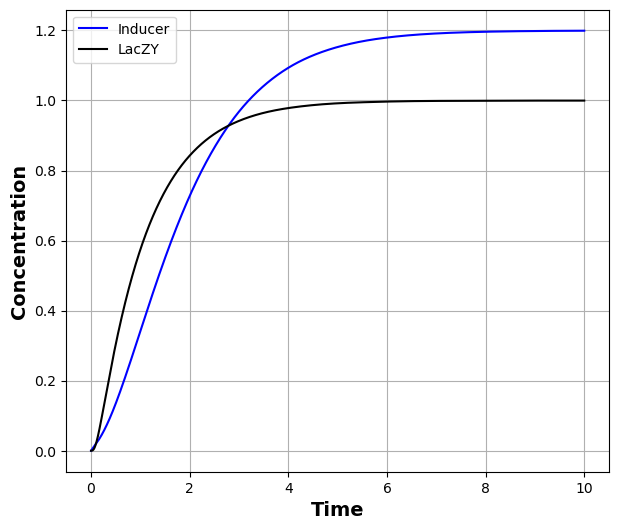

In [6]:
xi = 0.200
# y0 =  [0.266, 0.066]
y0 = [0,0]
delta_1 = 1
n = 2
kap = 0.02

t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 3000)  # Time points to evaluate the solution
sol = solve_ivp(lac_operon_ode, t_span, y0, t_eval=t_eval, args=(delta_1, xi, kap, n))

plt.figure(figsize=(7, 6))
plt.plot(sol.t, sol.y[0], label='Inducer', color='b')
plt.plot(sol.t, sol.y[1], label='LacZY', color='black')
plt.xlabel('Time', fontsize=14, fontweight='bold')
plt.ylabel('Concentration', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

## At steady state

<ul style="font-size:25px";> The derivatives are equal to zero </ul>

\begin{align}
ZY &= \delta_1 Lac - \xi \\
ZY &= f(Lac) = \frac{Lac^n}{Lac^n + K^n}
\end{align}



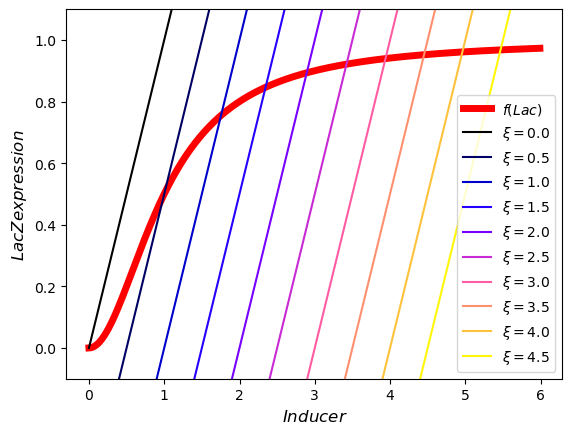

In [7]:
def func_one(Lac, delta_1, xi):    # first function above
    return delta_1 * Lac - xi

def func_hill(Lac, kap, n):    # second function above (Hill function)
    return Lac**n / (Lac**n + kap**n)

K = 1    # half saturation point for Hill function
n = 2    # Hill coefficient
x_array = np.arange(0, 6, 0.01)
f_array = func_hill(x_array, K, n)    # Hill function

delta_1 = 1 # keep gamma fixed
xi_list = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5]    # vary xi

norm = matplotlib.colors.Normalize(vmin=0, vmax=len(xi_list), clip=True)
mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap='gnuplot2')
xi_color = np.array([(mapper.to_rgba(v)) for v in range(len(xi_list))])


i = 0
plt.figure()
plt.plot(x_array, f_array, 'red', label=r'$f(Lac)$', linewidth=5)    # plot Hill function
for xi in xi_list:
    y_array = func_one(x_array, delta_1, xi)
    plt.plot(x_array, y_array, color=xi_color[i], label=r'$\xi=%.1f$' % xi)    # plot straight lines
    i+=1
plt.ylim(-0.1, 1.1)
plt.xlabel(r'$Inducer$', fontsize=12, fontweight='bold')
plt.ylabel(r'$LacZ expression$', fontsize=12, fontweight='bold')
plt.legend()
plt.show()
    